# Prepaere The Data

In [107]:
# 1. นำเข้าไลบรารี
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
# 2. เชื่อมต่อ Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
# 3. โหลดข้อมูล
data_path = "/content/drive/MyDrive/Advanced/housing.csv"
housing = pd.read_csv(data_path)

# Check Basic Data

In [111]:
# 4. สำรวจข้อมูลเบื้องต้น
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [84]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [110]:
# 1. ตรวจสอบ missing values
housing.isnull().any()

,0
Avg. Area Income,False
Avg. Area House Age,False
Avg. Area Number of Rooms,False
Avg. Area Number of Bedrooms,False
Area Population,False
Price,False
Address,False


In [85]:
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


array([[<Axes: title={'center': 'Avg. Area Income'}>,
        <Axes: title={'center': 'Avg. Area House Age'}>],
       [<Axes: title={'center': 'Avg. Area Number of Rooms'}>,
        <Axes: title={'center': 'Avg. Area Number of Bedrooms'}>],
       [<Axes: title={'center': 'Area Population'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

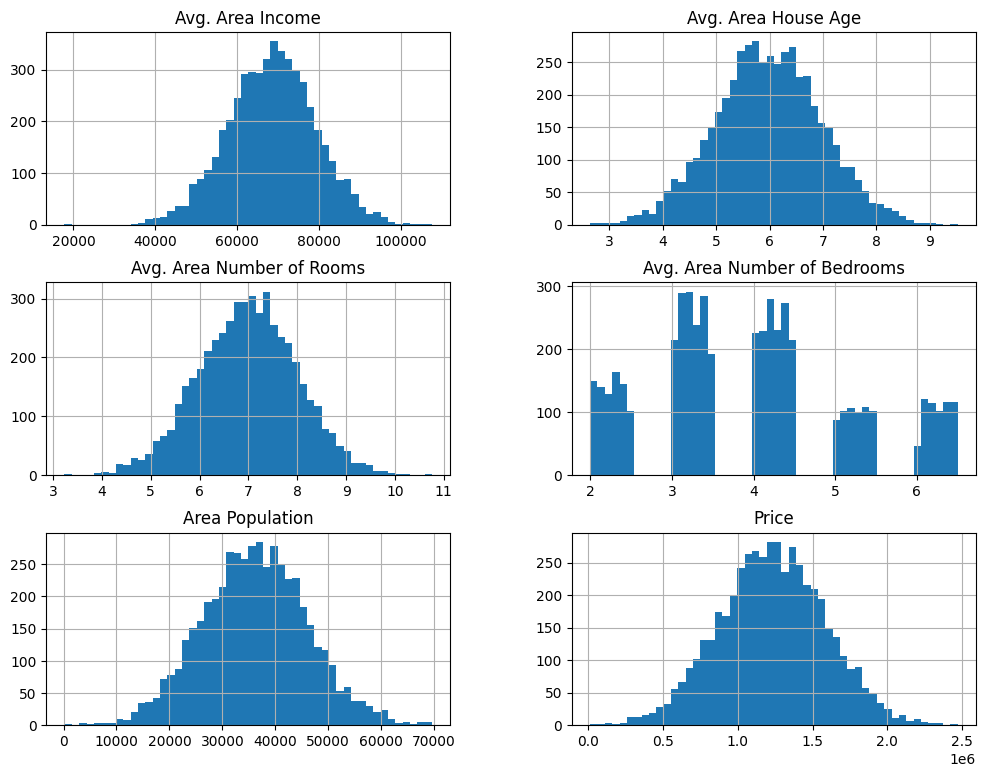

In [86]:
housing.hist(bins=50, figsize=(12,9))

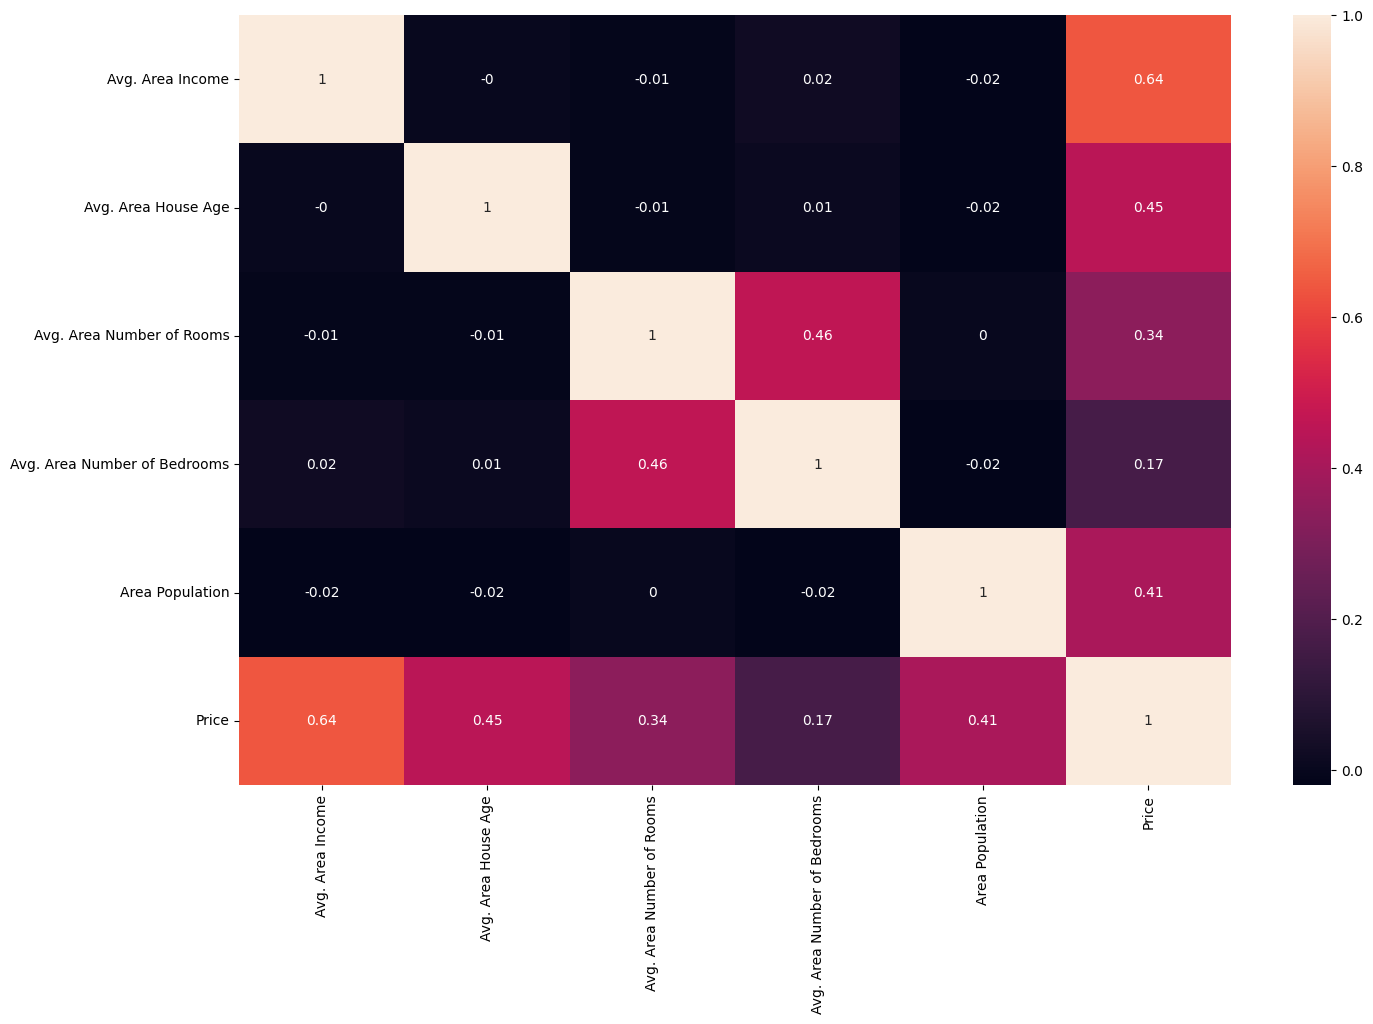

In [104]:
# พล็อต Heatmap
X_co = housing[['Avg. Area Income', 'Avg. Area House Age',
             'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
             'Area Population','Price']]


plt.figure(figsize=(16,10))
corelation_matrix = X_co.corr().round(2)
sns.heatmap(corelation_matrix,annot=True)
plt.show()
plt.close()

# Create Model

In [116]:
# 6. แยกตัวแปรอิสระ (X) และ ตัวแปรตาม (y)
X = housing[['Avg. Area Income', 'Avg. Area House Age',
             'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
             'Area Population']]

y = housing['Price']

In [117]:
# 7. แบ่งข้อมูลเป็น train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# 8. สร้างโมเดล Linear Regression
model = LinearRegression()

# 9. Cross-validation (5-fold)
cv_scores = cross_val_score(model, X_train, y_train,
                            cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores  # เปลี่ยนเป็นค่าบวก

# คำนวณค่าRMSE

avg_rmse = np.sqrt(avg_mse)

# แสดงผลโดยปัดเศษทศนิยม 2 ตำแหน่ง
print("ค่า RMSE:", round(avg_rmse, 2))

ค่า RMSE: 101456.04


In [120]:
# 10. ฝึกโมเดล
model.fit(X_train, y_train)

# 11. พยากรณ์ผลบน test set
y_pred = model.predict(X_test)

# 12. ประเมินโมเดล
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# แสดงผลลัพธ์โดยปัดทศนิยม 2 ตำแหน่ง
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 10089009299.50
Root Mean Squared Error (RMSE): 100444.06
R-squared (R²): 0.92


In [122]:
# 13. แสดงสมการถดถอย
print("\n=== สมการถดถอยเชิงเส้น ===")
print(f"Intercept (ค่าคงที่): {model.intercept_:.2f}")

coef_dict = dict(zip(X.columns, model.coef_))
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef:.2f}")


=== สมการถดถอยเชิงเส้น ===
Intercept (ค่าคงที่): -2635072.90
Avg. Area Income: 21.65
Avg. Area House Age: 164666.48
Avg. Area Number of Rooms: 119624.01
Avg. Area Number of Bedrooms: 2440.38
Area Population: 15.27


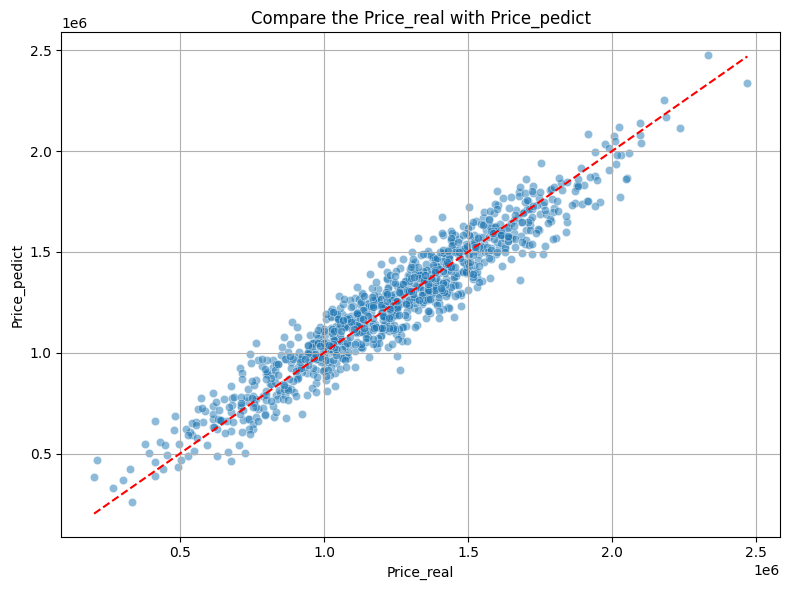

In [123]:
# 14. พล็อตเปรียบเทียบค่าจริงกับค่าทำนาย
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')  # เส้นอ้างอิง
plt.xlabel("Price_real")
plt.ylabel("Price_pedict")
plt.title("Compare the Price_real with Price_pedict")
plt.grid(True)
plt.tight_layout()
plt.show()

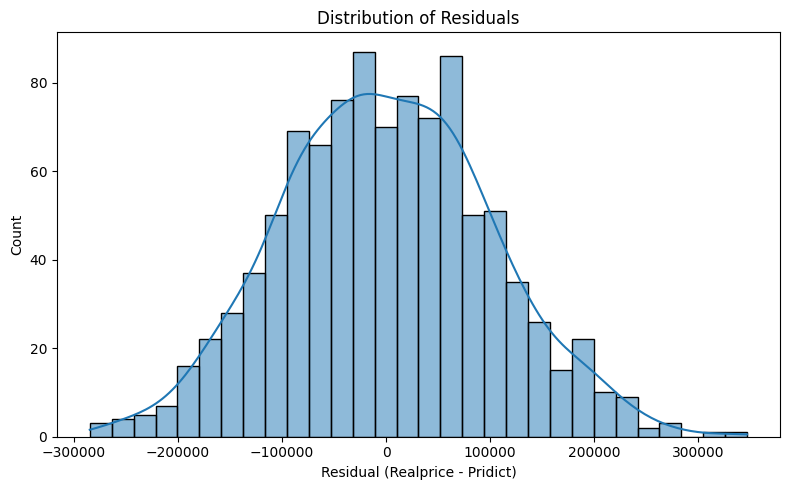

In [124]:
# 15. พล็อต Residual (ค่าคลาดเคลื่อน)
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Realprice - Pridict)")
plt.tight_layout()
plt.show()